In [1]:
using Pkg
Pkg.develop(path="C:\\Users\\andre\\Desktop\\EPFL\\Master-Project\\ImaginaryTimeEvolutionPauliPropagation")

# using Pkg
# Pkg.add(url="https://github.com/MSRudolph/PauliPropagation.jl.git", rev="dev")

   Resolving package versions...
  No Changes to `C:\Users\andre\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\andre\.julia\environments\v1.10\Manifest.toml`


In [2]:
using Revise
Revise.revise()

In [3]:
using Revise
using PauliPropagation
using Plots
using LinearAlgebra
using LaTeXStrings

In [ ]:
θ = 1im

0 + 10im

In [51]:
# the computational basis matrices
rzmat = tomatrix(PauliRotation(:Z, 1), θ)
rxmat = tomatrix(PauliRotation(:X, 1), θ)
rzzmat = tomatrix(PauliRotation([:Z, :Z], [1, 2]), θ)

# the Pauli basis matrices
rzptm = calculateptm(rzmat; heisenberg=false)
rxptm = calculateptm(rxmat; heisenberg=false)
rzzptm = calculateptm(rzzmat; heisenberg=false)

# the Pauli basis transfermaps
rzmap = totransfermap(rzptm)
rxmap = totransfermap(rxptm)
rzzmap = totransfermap(rzzptm);

In [61]:
nq = 5
topology = bricklayertopology(nq)

# the circuit
circuit = Gate[]
append!(circuit, TransferMapGate(rxmap, ii) for ii in 1:nq);
# append!(circuit, TransferMapGate([ii], rzmap) for ii in 1:nq);
# append!(circuit, TransferMapGate(collect(pair), rzzmap) for pair in topology);

5-element Vector{Gate}:
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 11013.23292010332), (0x01, 11013.23287470339)], [(0x00, 11013.23287470339), (0x01, 11013.23292010332)], [(0x02, 1.0)], [(0x03, 1.0)]], [1])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 11013.23292010332), (0x01, 11013.23287470339)], [(0x00, 11013.23287470339), (0x01, 11013.23292010332)], [(0x02, 1.0)], [(0x03, 1.0)]], [2])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 11013.23292010332), (0x01, 11013.23287470339)], [(0x00, 11013.23287470339), (0x01, 11013.23292010332)], [(0x02, 1.0)], [(0x03, 1.0)]], [3])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 11013.23292010332), (0x01, 11013.23287470339)], [(0x00, 11013.23287470339), (0x01, 11013.23292010332)], [(0x02, 1.0)], [(0x03, 1.0)]], [4])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 11013.23292010332), (0x01, 11013.23287470339)], [(0x00, 11013

In [7]:
# # Manuel version

# nls = 1
# overlapsManuel = Float64[overlapwithplus(psum) / sqrt(2^nq)]
# for _ in 1:nls
#     psum = propagate!(circuit, psum)
#     @show psum
#     # @show norm(psum)
#     mult!(psum, 1/norm(psum))
#     push!(overlapsManuel, overlapwithplus(psum) / sqrt(2^nq))
# end

In [64]:
# Zoe Version

nls = 10

pstr = PauliString(nq, :I, 1)
psum = PauliSum(pstr)
beta = Float64[]

overlapsEvery = Float64[]
for i in 1:nls
    psum = propagate!(circuit, psum, normalization=true)
    #psum = mult!(psum, 1/((2^nq)*getcoeff(psum, :I, 1)))
    push!(overlapsEvery, overlapwithplus(psum))
    push!(beta, 0.1*i)
    println(psum)
end

pstr = PauliString(nq, :I, 1)
psum = PauliSum(pstr)
overlapsEnd = Float64[]
for i in 1:nls
    psum = propagate!(circuit, psum)
    push!(overlapsEnd, overlapwithplus(psum))
end
overlapsEnd /= (2^nq*getcoeff(psum, :I, 1))

PauliSum(nqubits: 5, 32 Pauli terms:
 0.03125 * IXIIX
 0.03125 * XXIII
 0.03125 * IIXII
 0.03125 * IXXII
 0.03125 * XIXXI
 0.03125 * XXXXX
 0.03125 * XXIXX
 0.03125 * XIXII
 0.03125 * IXXXX
 0.03125 * IIIIX
 0.03125 * XXXIX
 0.03125 * IIIII
 0.03125 * XIIII
 0.03125 * XXIXI
 0.03125 * IXIXI
 0.03125 * XXXXI
 0.03125 * IIXIX
 0.03125 * XIXXX
 0.03125 * IIXXI
 0.03125 * IIIXX
  ⋮)
PauliSum(nqubits: 5, 32 Pauli terms:
 0.03125 * IXIIX
 0.03125 * XXIII
 0.03125 * IIXII
 0.03125 * IXXII
 0.03125 * XIXXI
 0.03125 * XXXXX
 0.03125 * XXIXX
 0.03125 * XIXII
 0.03125 * IXXXX
 0.03125 * IIIIX
 0.03125 * IIIII
 0.03125 * XIIII
 0.03125 * XXXIX
 0.03125 * XXIXI
 0.03125 * IXIXI
 0.03125 * XXXXI
 0.03125 * IIXIX
 0.03125 * IIXXI
 0.03125 * XIXXX
 0.03125 * IIIXX
  ⋮)
PauliSum(nqubits: 5, 32 Pauli terms:
 0.03125 * IXIIX
 0.03125 * XXIII
 0.03125 * IIXII
 0.03125 * IXXII
 0.03125 * XIXXI
 0.03125 * XXXXX
 0.03125 * XXIXX
 0.03125 * XIXII
 0.03125 * IXXXX
 0.03125 * IIIIX
 0.03125 * IIIII
 0.03125 * X

10-element Vector{Float64}:
 3.6938830684872974e-196
 1.9151695967140236e-174
 9.92959039626507e-153
 5.148200222412057e-131
 2.6691902155412934e-109
 1.3838965267367436e-87
 7.175095973164439e-66
 3.720075976020844e-44
 1.92874984796392e-22
 1.0000000000000004

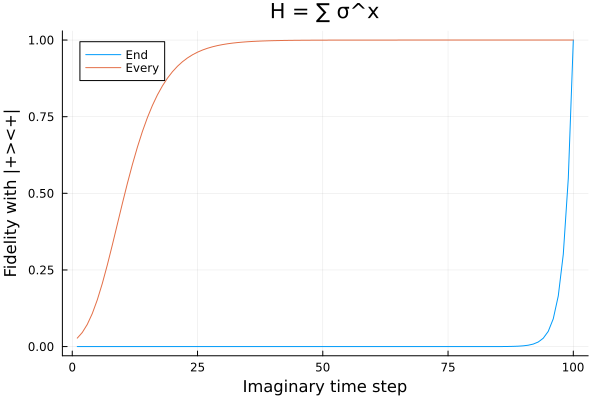

In [9]:
plot(overlapsEnd, ylabel="Fidelity with |+><+|", xlabel="Imaginary time step", label="End", title="H = ∑ σ^x")
plot!(overlapsEvery, ylabel="Fidelity with |+><+|", xlabel="Imaginary time step", label="Every", title="H = ∑ σ^x")


In [10]:
function XMatrix(n::Int, i::Int)
    Xmat = [0 1; 1 0]
    Imat = [1 0; 0 1]

    operator = (i == 1) ? Xmat : Imat

    for j in 2:n
        if j == i
            operator = kron(operator, Xmat)
        else
            operator = kron(operator, Imat)
        end
    end
    
    return operator
end

function ZMatrix(n::Int, i::Int)
    Zmat = [1 0; 0 -1]
    Imat = [1 0; 0 1]

    operator = (i == 1) ? Zmat : Imat

    for j in 2:n
        if j == i
            operator = kron(operator, Zmat)
        else
            operator = kron(operator, Imat)
        end
    end
    
    return operator
end

ZMatrix (generic function with 1 method)

In [11]:
# function imaginaryTimeEvolution(nqubits::Int, h::Matrix, beta::Float64)
#     operator = exp(-beta/2*h)*I(2^nqubits)*exp(-beta/2*h)/(2^nqubits)
#     return operator/tr(exp(-beta*h))*(2^nqubits)
# end

function imaginaryTimeEvolution(nqubits::Int, h::Matrix, beta::Float64)
    operator = exp(-beta*h)
    return operator/tr(exp(-beta*h))
end

function imaginaryTimeEvolutionState(nqubits::Int, h::Matrix, beta::Float64, state::Vector)
    operator = exp(-beta*h)*state
    return operator/LinearAlgebra.norm(operator)
end

imaginaryTimeEvolutionState (generic function with 1 method)

In [12]:
#H = kron(XMatrix(1, 1),XMatrix(1, 1),XMatrix(1, 1))
nq = 6
H = I(2^nq)
for i in 1:nq
    H += XMatrix(nq, i)
end


In [13]:
state = [1; 1]/sqrt(2)
state = kron(state, state, state, state, state, state)

finalDensity = imaginaryTimeEvolution(nq, H, -100.0)
println(tr(finalDensity))
display(finalDensity)
println(state'*finalDensity*state)


64×64 Matrix{Float64}:
 0.015625  0.015625  0.015625  0.015625  …  0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625  …  0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 ⋮                                       ⋱                      
 0.015625  0.015625  0.015625  0.015625  …  0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015625     0.015625  0.015625  0.015625
 0.015625  0.015625  0.015625  0.015

1.0
0.9999999999999991


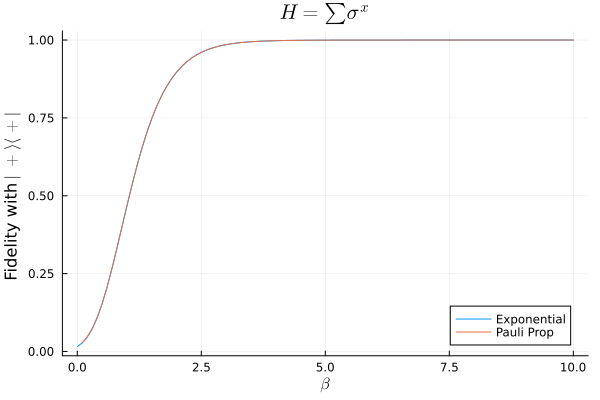

In [14]:
nq = 6
beta2 = LinRange(0, 10, 100)
overlap = Float64[]
for i in beta2
    density = imaginaryTimeEvolution(nq, H, -i)
    push!(overlap, state'*density*state)
end

plot(beta2, overlap, ylabel=L"Fidelity with $|+\rangle \leftangle+|$", xlabel=L"\beta",  label="Exponential", title=L"H = \sum \sigma^x")
plot!(beta, overlapsEvery, ylabel=L"Fidelity with $|+\rangle \leftangle+|$", xlabel=L"\beta", label="Pauli Prop", title=L"H = \sum \sigma^x")


15-element Vector{Gate}:
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 1.0050041680558033), (0x01, 0.10016675001984401)], [(0x00, 0.10016675001984401), (0x01, 1.0050041680558033)], [(0x02, 1.0)], [(0x03, 1.0)]], [1])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 1.0050041680558033), (0x01, 0.10016675001984401)], [(0x00, 0.10016675001984401), (0x01, 1.0050041680558033)], [(0x02, 1.0)], [(0x03, 1.0)]], [2])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 1.0050041680558033), (0x01, 0.10016675001984401)], [(0x00, 0.10016675001984401), (0x01, 1.0050041680558033)], [(0x02, 1.0)], [(0x03, 1.0)]], [3])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 1.0050041680558033), (0x01, 0.10016675001984401)], [(0x00, 0.10016675001984401), (0x01, 1.0050041680558033)], [(0x02, 1.0)], [(0x03, 1.0)]], [4])
 TransferMapGate{UInt8, Float64}(Vector{Tuple{UInt8, Float64}}[[(0x00, 1.0050041680558033), (0x01, 0.100166

In [38]:
size(nq)[1]

2

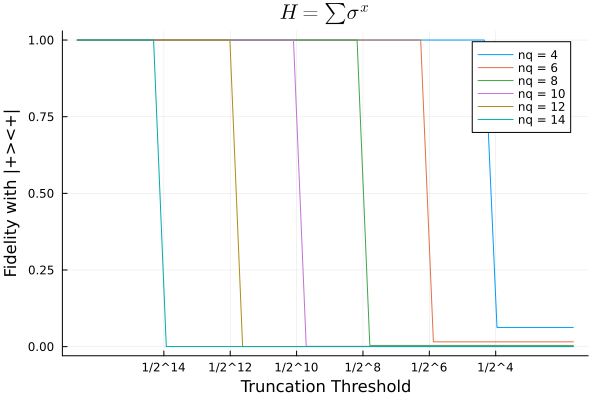

In [79]:
nq = [4,6,8,10,12,14]
plot()  # Initialize the plot

for i in 1:length(nq)
    topology = bricklayertopology(nq[i])

    # Define the circuit
    circuit = Gate[]
    append!(circuit, TransferMapGate(rxmap, ii) for ii in 1:nq[i])
    # append!(circuit, TransferMapGate([ii], rzmap) for ii in 1:nq[i])
    # append!(circuit, TransferMapGate(collect(pair), rzzmap) for pair in topology)

    minCoeff = 10 .^ LinRange(-5, -0.5, 40)
    overlap = Float64[]
    nls = 50
    pstr = PauliString(nq[i], :I, 1)

    for j in minCoeff
        overlapLoop = Float64[]
        psum = PauliSum(pstr)

        for _ in 1:nls  # Use underscore for unused loop variable
            psum = propagate!(circuit, psum; min_abs_coeff=j, normalization=true)
            push!(overlapLoop, overlapwithplus(psum))
        end
        
        push!(overlap, overlapLoop[end])
    end

    plot!(minCoeff, overlap, ylabel="Fidelity with |+><+|", xlabel="Truncation Threshold", 
          title=L"H = \sum \sigma^x", xscale=:log10, label="nq = $(nq[i])")
end
# Set custom x-axis ticks at 1/2^nq[i]
xtick_positions = 1.0 ./ (2 .^ nq)  # Compute tick positions
xtick_labels = ["1/2^$(nq[i])" for i in 1:length(nq)]  # Generate labels

plot!(xticks=(xtick_positions, xtick_labels))  # Apply x-axis ticks
display(plot!())  # Display the plot

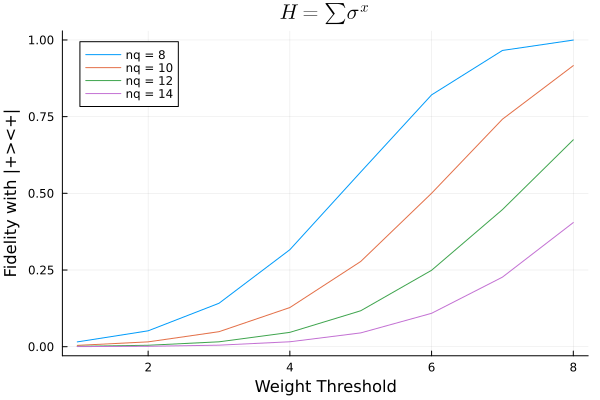

In [49]:
nq = [8,10,12,14]
plot()  # Initialize the plot

for i in 1:length(nq)
    topology = bricklayertopology(nq[i])

    # Define the circuit
    circuit = Gate[]
    append!(circuit, TransferMapGate(rxmap, ii) for ii in 1:nq[i])
    # append!(circuit, TransferMapGate([ii], rzmap) for ii in 1:nq[i])
    # append!(circuit, TransferMapGate(collect(pair), rzzmap) for pair in topology)

    maxWeight = [1,2,3,4,5,6,7,8] 
    overlap = Float64[]
    nls = 50
    pstr = PauliString(nq[i], :I, 1)

    for j in maxWeight
        overlapLoop = Float64[]
        psum = PauliSum(pstr)

        for _ in 1:nls  # Use underscore for unused loop variable
            psum = propagate!(circuit, psum; max_weight=j, normalization=true)
            push!(overlapLoop, overlapwithplus(psum))
        end
        
        push!(overlap, overlapLoop[end])
    end

    plot!(maxWeight, overlap, ylabel="Fidelity with |+><+|", xlabel="Weight Threshold", 
          title=L"H = \sum \sigma^x", label="nq = $(nq[i])")
end
display(plot!())  # Display the plot